## Data Understanding

In [1]:
import pandas as pd
import pyarrow.parquet as pq
import sys
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(threshold=sys.maxsize)

In [2]:
import glob

#  # Local path to the dataset files: roadworks folder contains the parquets in this case
# localpath = 'C:/Users/iris_/Semester 4/Project/trafficJams - combined/datasets'
# isFirstRun = True
# filesRead = 0
# for path in glob.glob(f"{localpath}/*"):
    

#  #   Setting the relative path: this notebook is in the same directory as the roadworks folder that contains the parquets 
#       path = path.replace(f"{localpath}\\", "datasets/")
#       if (path == 'trafficJams/_SUCCESS'):
#           continue
#       else:
#           filesRead += 1
#           print(f"files read: \033[1m {filesRead}\033[0m")
#           if (isFirstRun):
#               bdf = pd.read_parquet(path)
#               isFirstRun = False
#           else:
#               bdf = bdf.append(pd.read_parquet(path))

# sdf = pd.read_parquet("datasets/part-00000-8db7d477-6fa7-4a12-8344-50f16ace7988-c000.snappy.parquet")

The cell above shows how we read all the parquet files on the traffic jam and combined them into one big dataframe. We also made a small dataframe with just one parquet file for when we encounter big cells later on that take long to load so we can check if it works without having to wait every time we change a little thing. We've seen that there are rows that are the exact same except for the loaddatetimeutc so we are going to remove the duplicate values, in this case we used jam_id to get the unique rows. We then checked if jam_id is indeed unique as we now expect it to be and this is true.

In [3]:
# bdf_clean = bdf.sort_values('loaddatetimeutc').drop_duplicates(subset='jam_id', keep='last')
# bdf_clean['jam_id'].is_unique

In [4]:
# bdf_clean.to_csv('clean_trafficJams_combined.csv')
# bdf.to_csv('trafficJams_combined.csv')

In [5]:
bdf = pd.read_csv('clean_trafficJams_combined.csv')
bdf

,Unnamed: 0,jam_id,loaddatetimeutc,road,type,jam_delay,jam_distance,segmentstart,segmentend,jam_codedirection,...,jam_incidenttype,jam_label,jam_location,jam_reason,jam_road,jam_segmentid,jam_start,jam_to,jam_toloc_lat,jam_toloc_lon
0,276,12616919.0,2020-07-13 12:34:00,A9,a,300.0,2600.0,Amstelveen,Alkmaar,1.0,...,stationary-traffic,NaN,NaN,NaN,A9,3461.0,2020-07-13 12:18:00,knp. Velsen,52.44144,4.66828
1,277,12617140.0,2020-07-13 12:34:00,A9,a,300.0,3200.0,Alkmaar,Amstelveen,0.0,...,stationary-traffic,NaN,NaN,NaN,A9,3461.0,2020-07-13 08:32:00,knp. Rottepolderplein,52.38439,4.70737
2,281,12617113.0,2020-07-13 12:34:00,N33,n,180.0,2900.0,Veendam,Eemshaven,1.0,...,slow-traffic,NaN,NaN,NaN,N33,4721.0,2020-07-13 12:25:30,de aansluiting met de A7,53.17059,6.89396
3,164,12616677.0,2020-07-13 12:39:00,A7,a,360.0,2600.0,Heerenveen,Den Oever,0.0,...,stationary-traffic,NaN,NaN,NaN,A7,3411.0,2020-07-13 03:01:00,Breezanddijk,53.02215,5.21040
4,162,12613245.0,2020-07-13 12:39:00,A4,a,60.0,2000.0,Den Haag,Rotterdam,0.0,...,slow-traffic,NaN,NaN,De linkerrijstrook is dicht. Wegwerkzaamheden.,A4,3301.0,2020-07-13 07:49:30,Delft,51.98352,4.32902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426085,223,16653013.0,2022-02-23 18:34:00,N683,n,240.0,400.0,Westdorpe,Sas van Gent,0.0,...,stationary-traffic,NaN,NaN,NaN,N683,6320.0,2022-02-23 18:09:30,Sas van Gent,51.23003,3.80130
426086,224,16649328.0,2022-02-23 18:34:00,N795,n,480.0,1400.0,Nunspeet,Epe,1.0,...,stationary-traffic,NaN,NaN,NaN,N795,6062.0,2022-02-23 15:10:30,de aansluiting met de N309,52.35942,5.92583
426087,214,16650718.0,2022-02-23 18:34:00,A15,a,NaN,NaN,Europoort,Rotterdam,1.0,...,unknown,NaN,NaN,De rechterrijstrook is dicht. Kapotte vrachtauto.,A15,3059.0,NaN,afrit Brielle,51.90279,4.21244
426088,217,16625995.0,2022-02-23 18:34:00,N7,n,NaN,NaN,Groningen,de Duitse grens,1.0,...,road-closed,closed,NaN,Wegwerkzaamheden. Dicht.,N7,3412.0,NaN,Groningen-Helpman,53.20534,6.57403


!!!!! Copy  because original is saved seperately

In [6]:
joined_dfs = bdf.copy()

!!!!! Start dataunderstanding.

In [7]:
joined_dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426090 entries, 0 to 426089
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         426090 non-null  int64  
 1   jam_id             426089 non-null  float64
 2   loaddatetimeutc    426089 non-null  object 
 3   road               426089 non-null  object 
 4   type               426089 non-null  object 
 5   jam_delay          394975 non-null  float64
 6   jam_distance       414308 non-null  float64
 7   segmentstart       262283 non-null  object 
 8   segmentend         262283 non-null  object 
 9   jam_codedirection  426089 non-null  float64
 10  jam_afrc           426089 non-null  float64
 11  jam_category       426089 non-null  object 
 12  jam_from           426089 non-null  object 
 13  jam_fromloc_lat    426089 non-null  float64
 14  jam_fromloc_lon    426089 non-null  float64
 15  jam_incidenttype   426089 non-null  object 
 16  ja

<b>unnamed: 0</b><br>
This column is created when reading the CSV file. If the data was improperly written to the csv, this column might show up, if each row ends with a comma. <br>
We don't know what the values in this column represent, so we may delete the column later on.<br>
Type of column: int64<br>
426090 non-null values<br>

<b>jam_id</b><br>
A unique value for each traffic jam.<br>
Type of column: float64 (change from float to int)<br>
426089 non-null values<br>

<b>loaddatetimeutc</b><br>
The date and time the data got called in.<br>
Type of column: object (change to datetime[ns])<br>
426089 non-null values<br>

<b>road</b><br>
The road where the traffic jam is occuring. Interesting to know is that road and jam_road have the exact same values, we will delete one of the columns later on. There are a and n roads, but there are also cities/towns. These are probably smaller roads, so there's no number.<br>
Type of column: object<br>
426089 non-null values<br>

<b>type</b><br>
This is either a, n or other roads. Others roads could be either cities/towns or names of the road.<br>
Type of column: object (change from object to category)<br>
426089 non-null values<br>

<b>jam_delay</b><br>
The duration of the traffic jam in seconds. We want to convert this to minutes. <br>
Type of column: float64<br>
394975 non-null values<br>

<b>jam_distance</b><br>
The distance of the traffic jam in meters. We want to convert this to kilometers.<br>
Type of column: float64<br>
414308 non-null values<br>

<b>segmentstart</b><br>
In which city/town/road the traffic jam started.<br>
Type of column: object<br>
262283 non-null values<br>

<b>segmentend</b><br>
In which city/town/road the traffic jam ended.<br>
Type of column: object<br>
262283 non-null values<br>

<b>jam_codedirection</b><br>
We are not sure what jam_codedirection stands for, we checked this with JUGO and they are not sure either. So we won't use them and may delete this column later on.<br>
Type of column: float64 (change to category)<br>
426089 non-null values<br>

<b>jam_afrc</b><br>
We also do not know where this column stands for. We checked it with JUGO as well, and they do not know where it stands for either. We therefore will not use this column and may delete this column later on.<br>
Type of column: float64<br>
426089 non-null values<br>

<b>jam_category</b><br>
We noticed the only value is jams. We think this column is unnecessary, so we may delete this column later on.<br>
Type of column: object<br>
426089 non-null values<br>

<b>jam_from</b><br>
jam_from is either cities, towns or street names. We don't think we are going to use this column, but it helps to give us an indication on how traffic jams are administered.<br>
Type of column: object<br>
426089 non-null values<br>

<b>jam_fromloc_lat</b><br>
The latitude where the traffic jam starts.<br>
Type of column: float64<br>
426089 non-null values<br>

<b>jam_fromloc_lon</b><br>
The longitude where the traffic jam starts.<br>
Type of column: float64<br>
426089 non-null values<br>

<b>jam_incidenttype</b><br>
We are not sure if there are specific boundaries for the incident type related to the jam_delay and jam_distance. We only have jams as value, after discussing with JUGO, we agreed we that we will delete this column.<br>
Type of column: object (change to category)<br>
426089 non-null values<br>

<b>jam_label</b><br>
We expect that every missing value in jam_label is probably a traffic jam caused by just busy roads, so not by a closed road or accident. 'closed road' and 'accident' are the only values other than None for this column.<br>
Type of column: object<br>
12380 non-null values<br>

<b>jam_location</b><br>
The location of the traffic jam<br>
Type of column: object<br>
163806 non-null values<br>

<b>jam_reason</b><br>
The reason of the traffic jam. What caused it?<br>
Type of column: object<br>
20152 non-null values<br>

<b>jam_road</b><br>
The road where the traffic jam is occuring. Interesting to know is that road and jam_road have the exact same values, we will delete one of the columns later on. There are a and n roads, but there are also cities/towns. These are probably smaller roads, so there's no number.<br>
Type of column: object<br>
426079 non-null values<br>
 
<b>jam_segmentid</b><br>
The id of the location of certain part of a road.<br>
Type of column: float64 (change to int)<br>
426079 non-null values<br>

<b>jam_start</b><br>
The date and time the traffic jam started.<br>
Type of column: object<br>
412883 non-null values<br>

<b>jam_to</b><br>
Where the traffic jam ended.<br>
Type of column: object<br>
426079 non-null values<br>
 
<b>jam_toloc_lat</b><br>
The latitude where the traffic jam ends.<br>
Type of column: float64<br>
425987 non-null values<br>

<b>jam_toloc_lon</b><br>
The longitude where the traffic jam ends.<br>
Type of column: float64<br>
425987 non-null values<br>

#### Change these columns:
int: jam_id, jam_segmentid
category: type, jam_codedirection, jam_incidenttype <br><br>

#### Useful information:

Not one column is complete, they all have missing values.

-- road has different values, either the road name or city of the road. Needs to be looked at.

for missing values in loaddatetimeutc, it is called NaT (Not a time) <br><br>

#### Check with JUGO:
jam_delay is predicted to be seconds, so divide by 60 to get minutes. 
jam_distance is predicted to be meters, so divide by 1000 to get kms. 
Are there boundaries for the jam_incidenttype?
What is jam_afrc?


jam_from is either cities, towns or street names. We don't think we are going to use this column, but it helps to give us an indication on how traffic jams are administered.  
We could clean the jam_reason column, not necessary for the near future, could be useful.
We noticed that road and jam_road have the exact same values. So one of them could be removed.
jam_start has a few missing values -- 

The last row of the complete dataset is a bit weird, this row does not contain any data, so we will remove it.  
We should check if besides this row we have more rows where the columns all contain missing values.  
We want to remove the rows where ALL columns have missing values. After checking we found out that this is only one row and we will get rid of this.

In [8]:
joined_dfs[joined_dfs['jam_id'].isnull() == True]

,Unnamed: 0,jam_id,loaddatetimeutc,road,type,jam_delay,jam_distance,segmentstart,segmentend,jam_codedirection,...,jam_incidenttype,jam_label,jam_location,jam_reason,jam_road,jam_segmentid,jam_start,jam_to,jam_toloc_lat,jam_toloc_lon
426089,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We're going to have a look at the unique values that occur in some columns to see what we are dealing with.

In [9]:
joined_dfs['type'].unique()

array(['a', 'n', 'other', nan], dtype=object)

As you can see in the type column we have 'a', 'n', 'other' and 'nan'. Let's have a look at what other means.

In [10]:
joined_dfs[joined_dfs['type'] == 'other']

,Unnamed: 0,jam_id,loaddatetimeutc,road,type,jam_delay,jam_distance,segmentstart,segmentend,jam_codedirection,...,jam_incidenttype,jam_label,jam_location,jam_reason,jam_road,jam_segmentid,jam_start,jam_to,jam_toloc_lat,jam_toloc_lon
39,192,12618213.0,2020-07-13 14:08:00,Rotterdam,other,1020.0,2100.0,NaN,NaN,0.0,...,stationary-traffic,NaN,Molenlaan/Terbregseweg,NaN,Rotterdam,26010.0,2020-07-13 04:37:30,de President Rooseveltweg,51.95197,4.52501
52,222,12619679.0,2020-07-13 14:34:00,Rotterdam,other,780.0,2600.0,NaN,NaN,0.0,...,stationary-traffic,NaN,Molenlaan/Boszoom,NaN,Rotterdam,26010.0,2020-07-13 04:00:30,de Hoofdweg,51.94509,4.52742
190,36,12624061.0,2020-07-14 06:29:00,Rotterdam,other,660.0,2400.0,NaN,NaN,1.0,...,stationary-traffic,NaN,Boszoom/Molenlaan,NaN,Rotterdam,26010.0,2020-07-14 04:12:30,de Grindweg,51.96338,4.49602
197,284,12624119.0,2020-07-14 06:58:00,Rotterdam,other,960.0,2600.0,NaN,NaN,0.0,...,stationary-traffic,NaN,Molenlaan/Boszoom,NaN,Rotterdam,26010.0,2020-07-14 04:15:30,de Hoofdweg,51.94509,4.52742
312,59,12628574.0,2020-07-14 12:14:00,Rotterdam,other,1980.0,2200.0,NaN,NaN,1.0,...,stationary-traffic,NaN,Statenweg/'s-Gravendijkwal,NaN,Rotterdam,26008.0,2020-07-14 03:57:30,het Droogleever Fortuynplein,51.90796,4.46604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426065,298,16653036.0,2022-02-23 18:24:00,Maassluis,other,240.0,300.0,NaN,NaN,1.0,...,stationary-traffic,NaN,Maasdjik/Laan 1940-1945,NaN,Maassluis,28019.0,2022-02-23 18:22:00,de Prinses Julianalaan,51.91860,4.25728
426066,297,16652942.0,2022-02-23 18:24:00,Den Haag,other,180.0,400.0,NaN,NaN,1.0,...,stationary-traffic,NaN,Dedemsvaartweg,NaN,Den Haag,28076.0,2022-02-23 17:42:00,de Erasmusweg,52.04037,4.27997
426069,227,16653053.0,2022-02-23 18:34:00,Rotterdam,other,180.0,300.0,NaN,NaN,0.0,...,stationary-traffic,NaN,Maasboulevard/Abram van Rijckevorselweg,NaN,Rotterdam,26007.0,2022-02-23 18:31:00,de Kralingse Zoom,51.91417,4.52807
426070,226,16652987.0,2022-02-23 18:34:00,Rotterdam,other,300.0,400.0,NaN,NaN,0.0,...,stationary-traffic,NaN,Schiedamsedijk,NaN,Rotterdam,26003.0,2022-02-23 17:56:30,de Boompjes,51.91224,4.48214


We can see that when the roadtype is other that for the road column we don't have numbers but citynames. We think that this tells us that these roads are just small roads in those cities. We should think about the possibility that these are unuseable for us.

In [11]:
joined_dfs['jam_codedirection'].unique()

array([ 1.,  0.,  2., nan])

In [12]:
joined_dfs['jam_category'].unique()

array(['jams', nan], dtype=object)

jam_category is useless, it is only jams and missing values as values. 
Seeing this dataset is about traffic jams, we could remove this column.

In [13]:
joined_dfs['jam_incidenttype'].unique()

array(['stationary-traffic', 'slow-traffic', 'queing-traffic',
       'road-closed', 'diversion', 'unknown', 'roadwork', nan],
      dtype=object)

check if when the 'jam_label' is closed, if the jam_incidenttype is also closed.
As far as we can see this is true.

In [14]:
# Maybe check to be 100% sure
print(joined_dfs['jam_label'].unique())
joined_dfs[joined_dfs['jam_label'] == 'closed']

[nan 'closed' 'accident']


,Unnamed: 0,jam_id,loaddatetimeutc,road,type,jam_delay,jam_distance,segmentstart,segmentend,jam_codedirection,...,jam_incidenttype,jam_label,jam_location,jam_reason,jam_road,jam_segmentid,jam_start,jam_to,jam_toloc_lat,jam_toloc_lon
24,366,12618300.0,2020-07-13 13:43:00,N35,n,NaN,NaN,Almelo,Zwolle,1.0,...,road-closed,closed,NaN,Dicht. Door een ongeluk.,N35,3281.0,NaN,Hoonhorst,52.47724,6.19041
25,367,126183000.0,2020-07-13 13:43:00,N35,n,NaN,NaN,Zwolle,Almelo,1.0,...,road-closed,closed,NaN,Dicht. Door een ongeluk.,N35,3281.0,NaN,Hoonhorst,52.44743,6.22872
41,550,12618789.0,2020-07-13 14:18:00,A12,a,NaN,NaN,Den Haag,Utrecht,1.0,...,road-closed,closed,NaN,Kapotte vrachtauto. Verbindingsweg dicht.,A12,3020.0,NaN,knp. Prins Clausplein naar de A4 richting Amst...,52.06418,4.36734
92,479,12619527.0,2020-07-13 15:14:00,A58,a,NaN,NaN,Tilburg,Breda,0.0,...,road-closed,closed,NaN,Kapotte vrachtauto. De oprit is dicht.,A58,3354.0,NaN,Bavel,51.55604,4.85225
122,93,12621738.0,2020-07-13 15:53:00,A15,a,60.0,900.0,Gorinchem,Rotterdam,0.0,...,road-closed,closed,NaN,Te hoog voertuig. De tunnel is dicht.,A15,3056.0,2020-07-13 15:45:30,Alblasserdam,51.85069,4.67780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426073,209,16626251.0,2022-02-23 18:34:00,A1,a,NaN,NaN,Amersfoort,Amsterdam,0.0,...,road-closed,closed,NaN,Verbindingsweg dicht. Wegdek in slechte toestand.,A1,3000.0,NaN,knp. Hoevelaken naar de A28 richting Zwolle,52.17816,5.43172
426074,210,16653002.0,2022-02-23 18:34:00,A4,a,240.0,2300.0,Amsterdam,Den Haag,0.0,...,road-closed,closed,NaN,Door een ongeluk. Dicht. Gebruik de rechter pa...,A4,3300.0,2022-02-23 16:12:00,Zoeterwoude-Rijndijk,52.13826,4.50707
426077,213,304932422.0,2022-02-23 18:34:00,A12,a,NaN,NaN,Den Haag,Utrecht,1.0,...,road-closed,closed,NaN,Wegwerkzaamheden. Dicht.,A12,3020.0,NaN,Den Haag-Bezuidenhout,52.07419,4.34007
426083,221,16653038.0,2022-02-23 18:34:00,N510,n,NaN,NaN,Alkmaar,Bergen aan Zee,0.0,...,road-closed,closed,NaN,Door een ongeluk. Dicht.,N510,6242.0,NaN,Bergen,52.66053,4.71603


In [15]:
# these two columns have the same values, one of them could be removed. Expand explanation.
joined_dfs['road'].equals(joined_dfs['jam_road'])

False

In [16]:
# we wanted to check if the start of the traffic jam is alway null when the jam_label is closed.
# slow-traffic and road-closed does not have a time (jam_start). Expand explanation.
joined_dfs[joined_dfs['jam_start'].isnull() == True]

,Unnamed: 0,jam_id,loaddatetimeutc,road,type,jam_delay,jam_distance,segmentstart,segmentend,jam_codedirection,...,jam_incidenttype,jam_label,jam_location,jam_reason,jam_road,jam_segmentid,jam_start,jam_to,jam_toloc_lat,jam_toloc_lon
24,366,12618300.0,2020-07-13 13:43:00,N35,n,NaN,NaN,Almelo,Zwolle,1.0,...,road-closed,closed,NaN,Dicht. Door een ongeluk.,N35,3281.0,NaN,Hoonhorst,52.47724,6.19041
25,367,126183000.0,2020-07-13 13:43:00,N35,n,NaN,NaN,Zwolle,Almelo,1.0,...,road-closed,closed,NaN,Dicht. Door een ongeluk.,N35,3281.0,NaN,Hoonhorst,52.44743,6.22872
41,550,12618789.0,2020-07-13 14:18:00,A12,a,NaN,NaN,Den Haag,Utrecht,1.0,...,road-closed,closed,NaN,Kapotte vrachtauto. Verbindingsweg dicht.,A12,3020.0,NaN,knp. Prins Clausplein naar de A4 richting Amst...,52.06418,4.36734
73,506,12620474.0,2020-07-13 14:54:00,A2,a,NaN,NaN,Utrecht,'s-Hertogenbosch,0.0,...,diversion,accident,NaN,Er staat een auto in brand. Omleiding ingestel...,A2,3104.0,NaN,knp. Oudenrijn,52.06562,5.07012
88,433,12620521.0,2020-07-13 15:09:00,A16,a,NaN,2000.0,Breda,Rotterdam,1.0,...,queing-traffic,NaN,NaN,"Door een ongeluk, de weg is weer vrij. op de p...",A16,3065.0,NaN,knp. Terbregseplein,51.95029,4.53009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426077,213,304932422.0,2022-02-23 18:34:00,A12,a,NaN,NaN,Den Haag,Utrecht,1.0,...,road-closed,closed,NaN,Wegwerkzaamheden. Dicht.,A12,3020.0,NaN,Den Haag-Bezuidenhout,52.07419,4.34007
426083,221,16653038.0,2022-02-23 18:34:00,N510,n,NaN,NaN,Alkmaar,Bergen aan Zee,0.0,...,road-closed,closed,NaN,Door een ongeluk. Dicht.,N510,6242.0,NaN,Bergen,52.66053,4.71603
426087,214,16650718.0,2022-02-23 18:34:00,A15,a,NaN,NaN,Europoort,Rotterdam,1.0,...,unknown,NaN,NaN,De rechterrijstrook is dicht. Kapotte vrachtauto.,A15,3059.0,NaN,afrit Brielle,51.90279,4.21244
426088,217,16625995.0,2022-02-23 18:34:00,N7,n,NaN,NaN,Groningen,de Duitse grens,1.0,...,road-closed,closed,NaN,Wegwerkzaamheden. Dicht.,N7,3412.0,NaN,Groningen-Helpman,53.20534,6.57403


After talking with JUGO we received some answers to our questions. We will now work with the received information.

- What we already expected, the jam_delay is in seconds and the jam_distance is in meters. 
- For jam_incidenttype it is not completely clear what queing traffic is. It seems that it is a combination of slow-traffic and stationary-traffic. Slow traffic should be at least 2 kms long with a speed not faster than 50 km/h, but normally faster than 25 km/h. Stationary traffic should also be at least 2 kms long with a speed slower than 25 km/h.
    - We did a few calculations ourselves, but it seems that it is not as strict when looking at the average speed. For example, one of the rows with slow-traffic has an average speed of around 76 km/h, which is much more than the 50 km/h that was mentioned by Rijkswaterstaat.
- The cities/towns in the jam_road column should not be there, this is probably a shift in columns. If possible, we should correct this. If this is not possible, JUGO advised to see if we remove these rows.
- JUGO was also not sure about what the column AFRC stands for. The same goes for jam_codedirection. As far as they know, they don't use them, so we also won't use them.

In [17]:
# For some of the missing values in jam_delay, there is also a missing value in jam_distance, we think this is MAR. 
joined_dfs[joined_dfs['jam_delay'].isna()]

,Unnamed: 0,jam_id,loaddatetimeutc,road,type,jam_delay,jam_distance,segmentstart,segmentend,jam_codedirection,...,jam_incidenttype,jam_label,jam_location,jam_reason,jam_road,jam_segmentid,jam_start,jam_to,jam_toloc_lat,jam_toloc_lon
24,366,12618300.0,2020-07-13 13:43:00,N35,n,NaN,NaN,Almelo,Zwolle,1.0,...,road-closed,closed,NaN,Dicht. Door een ongeluk.,N35,3281.0,NaN,Hoonhorst,52.47724,6.19041
25,367,126183000.0,2020-07-13 13:43:00,N35,n,NaN,NaN,Zwolle,Almelo,1.0,...,road-closed,closed,NaN,Dicht. Door een ongeluk.,N35,3281.0,NaN,Hoonhorst,52.44743,6.22872
41,550,12618789.0,2020-07-13 14:18:00,A12,a,NaN,NaN,Den Haag,Utrecht,1.0,...,road-closed,closed,NaN,Kapotte vrachtauto. Verbindingsweg dicht.,A12,3020.0,NaN,knp. Prins Clausplein naar de A4 richting Amst...,52.06418,4.36734
73,506,12620474.0,2020-07-13 14:54:00,A2,a,NaN,NaN,Utrecht,'s-Hertogenbosch,0.0,...,diversion,accident,NaN,Er staat een auto in brand. Omleiding ingestel...,A2,3104.0,NaN,knp. Oudenrijn,52.06562,5.07012
88,433,12620521.0,2020-07-13 15:09:00,A16,a,NaN,2000.0,Breda,Rotterdam,1.0,...,queing-traffic,NaN,NaN,"Door een ongeluk, de weg is weer vrij. op de p...",A16,3065.0,NaN,knp. Terbregseplein,51.95029,4.53009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426077,213,304932422.0,2022-02-23 18:34:00,A12,a,NaN,NaN,Den Haag,Utrecht,1.0,...,road-closed,closed,NaN,Wegwerkzaamheden. Dicht.,A12,3020.0,NaN,Den Haag-Bezuidenhout,52.07419,4.34007
426083,221,16653038.0,2022-02-23 18:34:00,N510,n,NaN,NaN,Alkmaar,Bergen aan Zee,0.0,...,road-closed,closed,NaN,Door een ongeluk. Dicht.,N510,6242.0,NaN,Bergen,52.66053,4.71603
426087,214,16650718.0,2022-02-23 18:34:00,A15,a,NaN,NaN,Europoort,Rotterdam,1.0,...,unknown,NaN,NaN,De rechterrijstrook is dicht. Kapotte vrachtauto.,A15,3059.0,NaN,afrit Brielle,51.90279,4.21244
426088,217,16625995.0,2022-02-23 18:34:00,N7,n,NaN,NaN,Groningen,de Duitse grens,1.0,...,road-closed,closed,NaN,Wegwerkzaamheden. Dicht.,N7,3412.0,NaN,Groningen-Helpman,53.20534,6.57403


In [18]:
# for now it seems that if jam_distance has missing values, jam_delay also has missing values.
check_missing = joined_dfs[joined_dfs['jam_distance'].isna()]
check_missing

,Unnamed: 0,jam_id,loaddatetimeutc,road,type,jam_delay,jam_distance,segmentstart,segmentend,jam_codedirection,...,jam_incidenttype,jam_label,jam_location,jam_reason,jam_road,jam_segmentid,jam_start,jam_to,jam_toloc_lat,jam_toloc_lon
24,366,12618300.0,2020-07-13 13:43:00,N35,n,NaN,NaN,Almelo,Zwolle,1.0,...,road-closed,closed,NaN,Dicht. Door een ongeluk.,N35,3281.0,NaN,Hoonhorst,52.47724,6.19041
25,367,126183000.0,2020-07-13 13:43:00,N35,n,NaN,NaN,Zwolle,Almelo,1.0,...,road-closed,closed,NaN,Dicht. Door een ongeluk.,N35,3281.0,NaN,Hoonhorst,52.44743,6.22872
41,550,12618789.0,2020-07-13 14:18:00,A12,a,NaN,NaN,Den Haag,Utrecht,1.0,...,road-closed,closed,NaN,Kapotte vrachtauto. Verbindingsweg dicht.,A12,3020.0,NaN,knp. Prins Clausplein naar de A4 richting Amst...,52.06418,4.36734
73,506,12620474.0,2020-07-13 14:54:00,A2,a,NaN,NaN,Utrecht,'s-Hertogenbosch,0.0,...,diversion,accident,NaN,Er staat een auto in brand. Omleiding ingestel...,A2,3104.0,NaN,knp. Oudenrijn,52.06562,5.07012
92,479,12619527.0,2020-07-13 15:14:00,A58,a,NaN,NaN,Tilburg,Breda,0.0,...,road-closed,closed,NaN,Kapotte vrachtauto. De oprit is dicht.,A58,3354.0,NaN,Bavel,51.55604,4.85225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426077,213,304932422.0,2022-02-23 18:34:00,A12,a,NaN,NaN,Den Haag,Utrecht,1.0,...,road-closed,closed,NaN,Wegwerkzaamheden. Dicht.,A12,3020.0,NaN,Den Haag-Bezuidenhout,52.07419,4.34007
426083,221,16653038.0,2022-02-23 18:34:00,N510,n,NaN,NaN,Alkmaar,Bergen aan Zee,0.0,...,road-closed,closed,NaN,Door een ongeluk. Dicht.,N510,6242.0,NaN,Bergen,52.66053,4.71603
426087,214,16650718.0,2022-02-23 18:34:00,A15,a,NaN,NaN,Europoort,Rotterdam,1.0,...,unknown,NaN,NaN,De rechterrijstrook is dicht. Kapotte vrachtauto.,A15,3059.0,NaN,afrit Brielle,51.90279,4.21244
426088,217,16625995.0,2022-02-23 18:34:00,N7,n,NaN,NaN,Groningen,de Duitse grens,1.0,...,road-closed,closed,NaN,Wegwerkzaamheden. Dicht.,N7,3412.0,NaN,Groningen-Helpman,53.20534,6.57403


In [19]:
# unfortunately, this is false. There are some values not missing.
check_missing['jam_delay'].equals(check_missing['jam_distance'])

False

## Data Preparation

We start by removing the last row which is a fault created by reading or creating the csv.

In [20]:
joined_dfs = joined_dfs.drop(joined_dfs.tail(1).index)

The things that we found during the Data Understanding phase that should be changed will now be changed in the Data Preparation phase. First up, we are going to make sure all the columns have the required datatypes.

We change the datatype of jam_id and jam_segmentid from float to int, because there are no decimals in the whole column. Changing this will give us more space to work with. Type and jam_incidenttype will be changed from object to category, since there are just a few unique values.

In [21]:
joined_dfs['jam_id'] = joined_dfs['jam_id'].astype('int')
# joined_dfs['jam_segmentid'] = joined_dfs['jam_segmentid'].astype('int')
joined_dfs['type'] =joined_dfs['type'].astype('category')
joined_dfs['jam_incidenttype'] = joined_dfs['jam_incidenttype'].astype('category')

!!!! Explain why the above didn't work and the solution.

In [22]:
joined_dfs.isnull().sum()

Unnamed: 0                0
jam_id                    0
loaddatetimeutc           0
road                      0
type                      0
jam_delay             31114
jam_distance          11781
segmentstart         163806
segmentend           163806
jam_codedirection         0
jam_afrc                  0
jam_category              0
jam_from                  0
jam_fromloc_lat           0
jam_fromloc_lon           0
jam_incidenttype          0
jam_label            413709
jam_location         262283
jam_reason           405937
jam_road                 10
jam_segmentid            10
jam_start             13206
jam_to                   10
jam_toloc_lat           102
jam_toloc_lon           102
dtype: int64

We wanted to convert jam_segmentid to int, but since there is at least one nan value in this column, this isn't possible. We decided to remove these rows. There is only 10 rows with a missing value, so we can miss these.

In [23]:
joined_dfs = joined_dfs[joined_dfs['jam_segmentid'].isnull() == False]

In [24]:
joined_dfs.isnull().sum()

Unnamed: 0                0
jam_id                    0
loaddatetimeutc           0
road                      0
type                      0
jam_delay             31105
jam_distance          11772
segmentstart         163806
segmentend           163806
jam_codedirection         0
jam_afrc                  0
jam_category              0
jam_from                  0
jam_fromloc_lat           0
jam_fromloc_lon           0
jam_incidenttype          0
jam_label            413705
jam_location         262273
jam_reason           405937
jam_road                  0
jam_segmentid             0
jam_start             13196
jam_to                    0
jam_toloc_lat            92
jam_toloc_lon            92
dtype: int64

since road and jam_road are equal, we can remove one of these columns, we removed road.

In [25]:
joined_dfs = joined_dfs.drop(columns = 'road')

!!!! Explain why only A and N roads.

In [26]:
joined_dfs = joined_dfs.loc[(joined_dfs['type'] == 'a') | (joined_dfs['type'] == 'n')]
joined_dfs

,Unnamed: 0,jam_id,loaddatetimeutc,type,jam_delay,jam_distance,segmentstart,segmentend,jam_codedirection,jam_afrc,...,jam_incidenttype,jam_label,jam_location,jam_reason,jam_road,jam_segmentid,jam_start,jam_to,jam_toloc_lat,jam_toloc_lon
0,276,12616919,2020-07-13 12:34:00,a,300.0,2600.0,Amstelveen,Alkmaar,1.0,0.0,...,stationary-traffic,NaN,NaN,NaN,A9,3461.0,2020-07-13 12:18:00,knp. Velsen,52.44144,4.66828
1,277,12617140,2020-07-13 12:34:00,a,300.0,3200.0,Alkmaar,Amstelveen,0.0,0.0,...,stationary-traffic,NaN,NaN,NaN,A9,3461.0,2020-07-13 08:32:00,knp. Rottepolderplein,52.38439,4.70737
2,281,12617113,2020-07-13 12:34:00,n,180.0,2900.0,Veendam,Eemshaven,1.0,3.0,...,slow-traffic,NaN,NaN,NaN,N33,4721.0,2020-07-13 12:25:30,de aansluiting met de A7,53.17059,6.89396
3,164,12616677,2020-07-13 12:39:00,a,360.0,2600.0,Heerenveen,Den Oever,0.0,0.0,...,stationary-traffic,NaN,NaN,NaN,A7,3411.0,2020-07-13 03:01:00,Breezanddijk,53.02215,5.21040
4,162,12613245,2020-07-13 12:39:00,a,60.0,2000.0,Den Haag,Rotterdam,0.0,0.0,...,slow-traffic,NaN,NaN,De linkerrijstrook is dicht. Wegwerkzaamheden.,A4,3301.0,2020-07-13 07:49:30,Delft,51.98352,4.32902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426084,222,16653049,2022-02-23 18:34:00,n,180.0,800.0,Geertruidenberg,Made,0.0,4.0,...,stationary-traffic,NaN,NaN,NaN,N623,6455.0,2022-02-23 18:30:00,Made,51.69034,4.81138
426085,223,16653013,2022-02-23 18:34:00,n,240.0,400.0,Westdorpe,Sas van Gent,0.0,4.0,...,stationary-traffic,NaN,NaN,NaN,N683,6320.0,2022-02-23 18:09:30,Sas van Gent,51.23003,3.80130
426086,224,16649328,2022-02-23 18:34:00,n,480.0,1400.0,Nunspeet,Epe,1.0,4.0,...,stationary-traffic,NaN,NaN,NaN,N795,6062.0,2022-02-23 15:10:30,de aansluiting met de N309,52.35942,5.92583
426087,214,16650718,2022-02-23 18:34:00,a,NaN,NaN,Europoort,Rotterdam,1.0,0.0,...,unknown,NaN,NaN,De rechterrijstrook is dicht. Kapotte vrachtauto.,A15,3059.0,NaN,afrit Brielle,51.90279,4.21244


In [27]:
joined_dfs['type'].unique()

['a', 'n']
Categories (3, object): ['a', 'n', 'other']

In [28]:
# because we filtered on only 'a' and 'n' roads, there are no more missing values in segmentstart, 
# segmentend and jam_codedirection.
joined_dfs[joined_dfs['segmentstart'].isna()]

,Unnamed: 0,jam_id,loaddatetimeutc,type,jam_delay,jam_distance,segmentstart,segmentend,jam_codedirection,jam_afrc,...,jam_incidenttype,jam_label,jam_location,jam_reason,jam_road,jam_segmentid,jam_start,jam_to,jam_toloc_lat,jam_toloc_lon


In [29]:
joined_dfs[joined_dfs['segmentend'].isna()]

,Unnamed: 0,jam_id,loaddatetimeutc,type,jam_delay,jam_distance,segmentstart,segmentend,jam_codedirection,jam_afrc,...,jam_incidenttype,jam_label,jam_location,jam_reason,jam_road,jam_segmentid,jam_start,jam_to,jam_toloc_lat,jam_toloc_lon


In [30]:
joined_dfs[joined_dfs['jam_codedirection'].isna()]

,Unnamed: 0,jam_id,loaddatetimeutc,type,jam_delay,jam_distance,segmentstart,segmentend,jam_codedirection,jam_afrc,...,jam_incidenttype,jam_label,jam_location,jam_reason,jam_road,jam_segmentid,jam_start,jam_to,jam_toloc_lat,jam_toloc_lon


we expect that every missing value in jam_label is probably a traffic jam caused by just busy roads, 
so not by a closed road or accident. These are the only values other than None for this column.

In [31]:
# check with group if we should fill out these missing values

joined_dfs[joined_dfs['jam_label'].isna()]

,Unnamed: 0,jam_id,loaddatetimeutc,type,jam_delay,jam_distance,segmentstart,segmentend,jam_codedirection,jam_afrc,...,jam_incidenttype,jam_label,jam_location,jam_reason,jam_road,jam_segmentid,jam_start,jam_to,jam_toloc_lat,jam_toloc_lon
0,276,12616919,2020-07-13 12:34:00,a,300.0,2600.0,Amstelveen,Alkmaar,1.0,0.0,...,stationary-traffic,NaN,NaN,NaN,A9,3461.0,2020-07-13 12:18:00,knp. Velsen,52.44144,4.66828
1,277,12617140,2020-07-13 12:34:00,a,300.0,3200.0,Alkmaar,Amstelveen,0.0,0.0,...,stationary-traffic,NaN,NaN,NaN,A9,3461.0,2020-07-13 08:32:00,knp. Rottepolderplein,52.38439,4.70737
2,281,12617113,2020-07-13 12:34:00,n,180.0,2900.0,Veendam,Eemshaven,1.0,3.0,...,slow-traffic,NaN,NaN,NaN,N33,4721.0,2020-07-13 12:25:30,de aansluiting met de A7,53.17059,6.89396
3,164,12616677,2020-07-13 12:39:00,a,360.0,2600.0,Heerenveen,Den Oever,0.0,0.0,...,stationary-traffic,NaN,NaN,NaN,A7,3411.0,2020-07-13 03:01:00,Breezanddijk,53.02215,5.21040
4,162,12613245,2020-07-13 12:39:00,a,60.0,2000.0,Den Haag,Rotterdam,0.0,0.0,...,slow-traffic,NaN,NaN,De linkerrijstrook is dicht. Wegwerkzaamheden.,A4,3301.0,2020-07-13 07:49:30,Delft,51.98352,4.32902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426082,220,16653048,2022-02-23 18:34:00,n,240.0,200.0,Gouda,Waddinxveen,1.0,4.0,...,stationary-traffic,NaN,NaN,NaN,N454,6092.0,2022-02-23 18:30:30,de aansluiting met de N207,52.04386,4.66001
426084,222,16653049,2022-02-23 18:34:00,n,180.0,800.0,Geertruidenberg,Made,0.0,4.0,...,stationary-traffic,NaN,NaN,NaN,N623,6455.0,2022-02-23 18:30:00,Made,51.69034,4.81138
426085,223,16653013,2022-02-23 18:34:00,n,240.0,400.0,Westdorpe,Sas van Gent,0.0,4.0,...,stationary-traffic,NaN,NaN,NaN,N683,6320.0,2022-02-23 18:09:30,Sas van Gent,51.23003,3.80130
426086,224,16649328,2022-02-23 18:34:00,n,480.0,1400.0,Nunspeet,Epe,1.0,4.0,...,stationary-traffic,NaN,NaN,NaN,N795,6062.0,2022-02-23 15:10:30,de aansluiting met de N309,52.35942,5.92583


all values in jam_location are now missing, so this column has become useless for us. 
This is because these streets were smaller roads and we filtered those out by filtering on only 'a' and 'n' roads.

In [32]:
joined_dfs[joined_dfs['jam_location'].isna()]

,Unnamed: 0,jam_id,loaddatetimeutc,type,jam_delay,jam_distance,segmentstart,segmentend,jam_codedirection,jam_afrc,...,jam_incidenttype,jam_label,jam_location,jam_reason,jam_road,jam_segmentid,jam_start,jam_to,jam_toloc_lat,jam_toloc_lon
0,276,12616919,2020-07-13 12:34:00,a,300.0,2600.0,Amstelveen,Alkmaar,1.0,0.0,...,stationary-traffic,NaN,NaN,NaN,A9,3461.0,2020-07-13 12:18:00,knp. Velsen,52.44144,4.66828
1,277,12617140,2020-07-13 12:34:00,a,300.0,3200.0,Alkmaar,Amstelveen,0.0,0.0,...,stationary-traffic,NaN,NaN,NaN,A9,3461.0,2020-07-13 08:32:00,knp. Rottepolderplein,52.38439,4.70737
2,281,12617113,2020-07-13 12:34:00,n,180.0,2900.0,Veendam,Eemshaven,1.0,3.0,...,slow-traffic,NaN,NaN,NaN,N33,4721.0,2020-07-13 12:25:30,de aansluiting met de A7,53.17059,6.89396
3,164,12616677,2020-07-13 12:39:00,a,360.0,2600.0,Heerenveen,Den Oever,0.0,0.0,...,stationary-traffic,NaN,NaN,NaN,A7,3411.0,2020-07-13 03:01:00,Breezanddijk,53.02215,5.21040
4,162,12613245,2020-07-13 12:39:00,a,60.0,2000.0,Den Haag,Rotterdam,0.0,0.0,...,slow-traffic,NaN,NaN,De linkerrijstrook is dicht. Wegwerkzaamheden.,A4,3301.0,2020-07-13 07:49:30,Delft,51.98352,4.32902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426084,222,16653049,2022-02-23 18:34:00,n,180.0,800.0,Geertruidenberg,Made,0.0,4.0,...,stationary-traffic,NaN,NaN,NaN,N623,6455.0,2022-02-23 18:30:00,Made,51.69034,4.81138
426085,223,16653013,2022-02-23 18:34:00,n,240.0,400.0,Westdorpe,Sas van Gent,0.0,4.0,...,stationary-traffic,NaN,NaN,NaN,N683,6320.0,2022-02-23 18:09:30,Sas van Gent,51.23003,3.80130
426086,224,16649328,2022-02-23 18:34:00,n,480.0,1400.0,Nunspeet,Epe,1.0,4.0,...,stationary-traffic,NaN,NaN,NaN,N795,6062.0,2022-02-23 15:10:30,de aansluiting met de N309,52.35942,5.92583
426087,214,16650718,2022-02-23 18:34:00,a,NaN,NaN,Europoort,Rotterdam,1.0,0.0,...,unknown,NaN,NaN,De rechterrijstrook is dicht. Kapotte vrachtauto.,A15,3059.0,NaN,afrit Brielle,51.90279,4.21244


jam_reason is a description about the traffic jam. This is not very useful, since we cannot really filter this.

In [33]:
# discuss if we remove the column
joined_dfs[joined_dfs['jam_reason'].isna()]

,Unnamed: 0,jam_id,loaddatetimeutc,type,jam_delay,jam_distance,segmentstart,segmentend,jam_codedirection,jam_afrc,...,jam_incidenttype,jam_label,jam_location,jam_reason,jam_road,jam_segmentid,jam_start,jam_to,jam_toloc_lat,jam_toloc_lon
0,276,12616919,2020-07-13 12:34:00,a,300.0,2600.0,Amstelveen,Alkmaar,1.0,0.0,...,stationary-traffic,NaN,NaN,NaN,A9,3461.0,2020-07-13 12:18:00,knp. Velsen,52.44144,4.66828
1,277,12617140,2020-07-13 12:34:00,a,300.0,3200.0,Alkmaar,Amstelveen,0.0,0.0,...,stationary-traffic,NaN,NaN,NaN,A9,3461.0,2020-07-13 08:32:00,knp. Rottepolderplein,52.38439,4.70737
2,281,12617113,2020-07-13 12:34:00,n,180.0,2900.0,Veendam,Eemshaven,1.0,3.0,...,slow-traffic,NaN,NaN,NaN,N33,4721.0,2020-07-13 12:25:30,de aansluiting met de A7,53.17059,6.89396
3,164,12616677,2020-07-13 12:39:00,a,360.0,2600.0,Heerenveen,Den Oever,0.0,0.0,...,stationary-traffic,NaN,NaN,NaN,A7,3411.0,2020-07-13 03:01:00,Breezanddijk,53.02215,5.21040
5,139,12616921,2020-07-13 12:43:00,a,180.0,3200.0,Rotterdam,Europoort,0.0,0.0,...,slow-traffic,NaN,NaN,NaN,A15,3059.0,2020-07-13 12:19:00,de Botlektunnel,51.87055,4.33089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426081,219,16652997,2022-02-23 18:34:00,n,300.0,1400.0,Veenendaal,Kesteren,0.0,3.0,...,stationary-traffic,NaN,NaN,NaN,N233,3820.0,2022-02-23 18:01:30,Achterberg,51.96718,5.57988
426082,220,16653048,2022-02-23 18:34:00,n,240.0,200.0,Gouda,Waddinxveen,1.0,4.0,...,stationary-traffic,NaN,NaN,NaN,N454,6092.0,2022-02-23 18:30:30,de aansluiting met de N207,52.04386,4.66001
426084,222,16653049,2022-02-23 18:34:00,n,180.0,800.0,Geertruidenberg,Made,0.0,4.0,...,stationary-traffic,NaN,NaN,NaN,N623,6455.0,2022-02-23 18:30:00,Made,51.69034,4.81138
426085,223,16653013,2022-02-23 18:34:00,n,240.0,400.0,Westdorpe,Sas van Gent,0.0,4.0,...,stationary-traffic,NaN,NaN,NaN,N683,6320.0,2022-02-23 18:09:30,Sas van Gent,51.23003,3.80130


In [34]:
joined_dfs[joined_dfs['jam_start'].isna()]

,Unnamed: 0,jam_id,loaddatetimeutc,type,jam_delay,jam_distance,segmentstart,segmentend,jam_codedirection,jam_afrc,...,jam_incidenttype,jam_label,jam_location,jam_reason,jam_road,jam_segmentid,jam_start,jam_to,jam_toloc_lat,jam_toloc_lon
24,366,12618300,2020-07-13 13:43:00,n,NaN,NaN,Almelo,Zwolle,1.0,3.0,...,road-closed,closed,NaN,Dicht. Door een ongeluk.,N35,3281.0,NaN,Hoonhorst,52.47724,6.19041
25,367,126183000,2020-07-13 13:43:00,n,NaN,NaN,Zwolle,Almelo,1.0,3.0,...,road-closed,closed,NaN,Dicht. Door een ongeluk.,N35,3281.0,NaN,Hoonhorst,52.44743,6.22872
41,550,12618789,2020-07-13 14:18:00,a,NaN,NaN,Den Haag,Utrecht,1.0,0.0,...,road-closed,closed,NaN,Kapotte vrachtauto. Verbindingsweg dicht.,A12,3020.0,NaN,knp. Prins Clausplein naar de A4 richting Amst...,52.06418,4.36734
73,506,12620474,2020-07-13 14:54:00,a,NaN,NaN,Utrecht,'s-Hertogenbosch,0.0,0.0,...,diversion,accident,NaN,Er staat een auto in brand. Omleiding ingestel...,A2,3104.0,NaN,knp. Oudenrijn,52.06562,5.07012
88,433,12620521,2020-07-13 15:09:00,a,NaN,2000.0,Breda,Rotterdam,1.0,0.0,...,queing-traffic,NaN,NaN,"Door een ongeluk, de weg is weer vrij. op de p...",A16,3065.0,NaN,knp. Terbregseplein,51.95029,4.53009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426073,209,16626251,2022-02-23 18:34:00,a,NaN,NaN,Amersfoort,Amsterdam,0.0,0.0,...,road-closed,closed,NaN,Verbindingsweg dicht. Wegdek in slechte toestand.,A1,3000.0,NaN,knp. Hoevelaken naar de A28 richting Zwolle,52.17816,5.43172
426077,213,304932422,2022-02-23 18:34:00,a,NaN,NaN,Den Haag,Utrecht,1.0,0.0,...,road-closed,closed,NaN,Wegwerkzaamheden. Dicht.,A12,3020.0,NaN,Den Haag-Bezuidenhout,52.07419,4.34007
426083,221,16653038,2022-02-23 18:34:00,n,NaN,NaN,Alkmaar,Bergen aan Zee,0.0,4.0,...,road-closed,closed,NaN,Door een ongeluk. Dicht.,N510,6242.0,NaN,Bergen,52.66053,4.71603
426087,214,16650718,2022-02-23 18:34:00,a,NaN,NaN,Europoort,Rotterdam,1.0,0.0,...,unknown,NaN,NaN,De rechterrijstrook is dicht. Kapotte vrachtauto.,A15,3059.0,NaN,afrit Brielle,51.90279,4.21244


In [35]:
# sometimes the jam_delay is visible, but the start of the traffic jam (jam_start) is not. 
# we noticed that most of the times when jam_start is null jam_delay is also null. but as you can see this is not the case.
joined_dfs['jam_delay'].equals(joined_dfs['jam_start'])

False

Now we have a pretty good idea on what the data means on a purely statistical basis, so let's have a look at some of the distributions in visuals.

In [36]:
incident_numbers = joined_dfs['jam_incidenttype'].value_counts()
incident_numbers

stationary-traffic    126724
queing-traffic         65738
slow-traffic           56542
road-closed             9821
unknown                 2542
diversion                868
roadwork                  38
Name: jam_incidenttype, dtype: int64

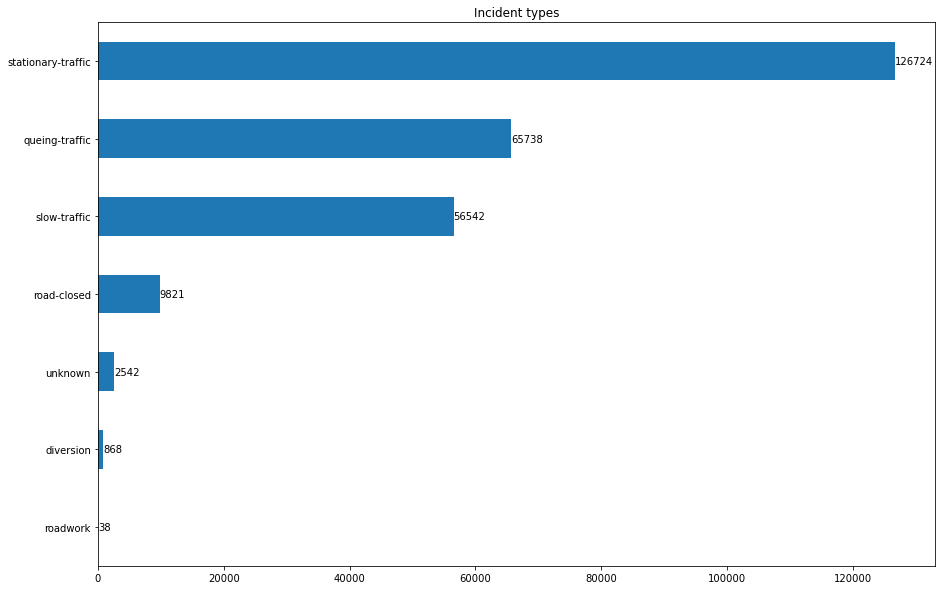

In [37]:
# roadwork only appears once, why?
# Maybe normalize or standardize?
# add counted values?

fig = plt.figure(figsize = (15,10))
ax = joined_dfs['jam_incidenttype'].value_counts().sort_values(ascending = True).plot(kind='barh')
plt.title("Incident types")
ax.bar_label(ax.containers[0])
plt.show()

In [1]:
joined_dfs = joined_dfs[joined_dfs['jam_start'].isnull() == False]
joined_dfs['jam_start'].unique()

In [39]:
joined_dfs['jam_start'] = pd.to_datetime(joined_dfs['jam_start'])

C:\Users\dorin\AppData\Local\Temp/ipykernel_15992/4210178174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_dfs['jam_start'] = pd.to_datetime(joined_dfs['jam_start'])


In [40]:
backup = joined_dfs.copy()

In [41]:
joined_dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249077 entries, 0 to 426086
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         249077 non-null  int64         
 1   jam_id             249077 non-null  int32         
 2   loaddatetimeutc    249077 non-null  object        
 3   type               249077 non-null  category      
 4   jam_delay          231409 non-null  float64       
 5   jam_distance       249048 non-null  float64       
 6   segmentstart       249077 non-null  object        
 7   segmentend         249077 non-null  object        
 8   jam_codedirection  249077 non-null  float64       
 9   jam_afrc           249077 non-null  float64       
 10  jam_category       249077 non-null  object        
 11  jam_from           249077 non-null  object        
 12  jam_fromloc_lat    249077 non-null  float64       
 13  jam_fromloc_lon    249077 non-null  float64 

In [42]:
joined_dfs['jam_start_hour'] = joined_dfs['jam_start'].apply(lambda x: x.hour)

C:\Users\dorin\AppData\Local\Temp/ipykernel_15992/465322112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_dfs['jam_start_hour'] = joined_dfs['jam_start'].apply(lambda x: x.hour)


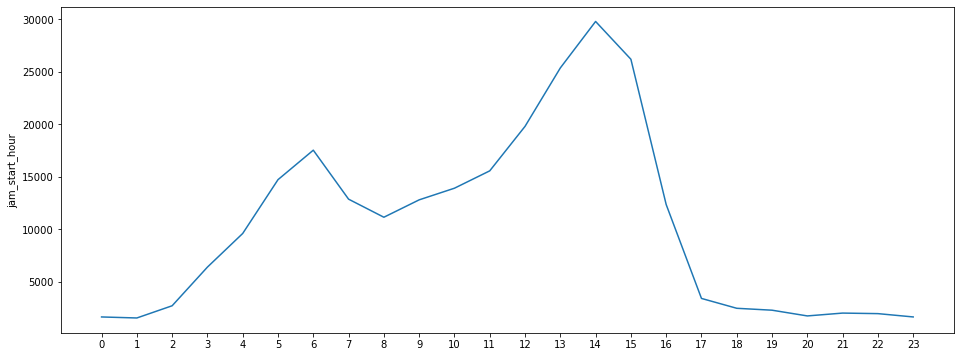

In [43]:
plt.figure(figsize=(16, 6))
(joined_dfs
 .jam_start_hour
 .value_counts()
 .pipe((sns.lineplot, 'data'))
)
plt.xticks(np.arange(0, 24, 1))
plt.show()

In [44]:
joined_dfs['jam_start_month'] = joined_dfs['jam_start'].apply(lambda x: x.month)

C:\Users\dorin\AppData\Local\Temp/ipykernel_15992/3584063014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_dfs['jam_start_month'] = joined_dfs['jam_start'].apply(lambda x: x.month)


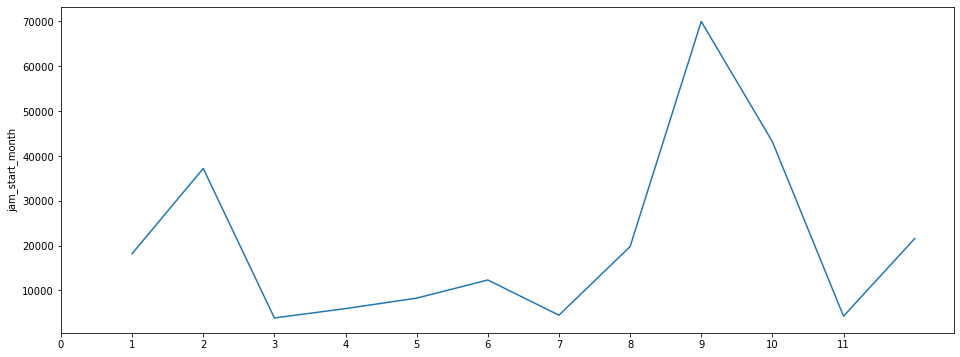

In [45]:
plt.figure(figsize=(16, 6))
(joined_dfs
 .jam_start_month
 .value_counts()
 .pipe((sns.lineplot, 'data'))
)
plt.xticks(np.arange(0, 12, 1))
plt.show()

<AxesSubplot:xlabel='type', ylabel='Count'>

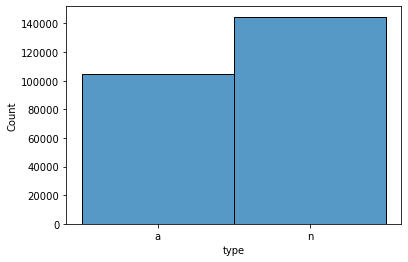

In [46]:
sns.histplot(joined_dfs['type'])

In [47]:
joined_dfs['jam_start_wkday'] = joined_dfs['jam_start'].apply(lambda x: x.weekday())

C:\Users\dorin\AppData\Local\Temp/ipykernel_15992/4212933611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_dfs['jam_start_wkday'] = joined_dfs['jam_start'].apply(lambda x: x.weekday())


In [48]:
# 0 = monday, 6 = sunday
joined_dfs['jam_start_wkday']

0         0
1         0
2         0
3         0
4         0
         ..
426081    2
426082    2
426084    2
426085    2
426086    2
Name: jam_start_wkday, Length: 249077, dtype: int64

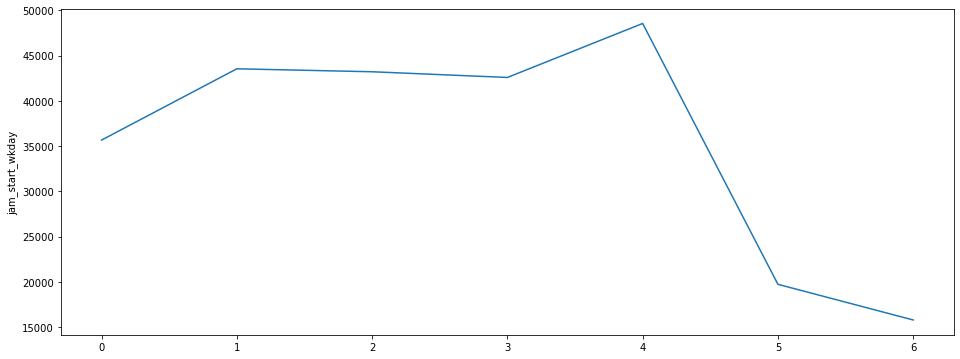

In [49]:
plt.figure(figsize=(16, 6))
(joined_dfs
 .jam_start_wkday
 .value_counts()
 .pipe((sns.lineplot, 'data'))
)
plt.xticks(np.arange(0, 7, 1))
plt.show()

!!!!! Look back at the research in our project proposal and compare.

## Pre processing  
For this project, where we want to predict when there are traffic jams, we are going to use time series forecasting.  

## Feature selection
By working on this dataset it is pretty clear that we're going to use the traffic jams in the Netherlands. Speciffically the 'a' and 'n' roads. So in the end our target variable is the amount of traffic jams on weekdays.  

## 

In [50]:
joined_dfs['year'] = joined_dfs['jam_start'].apply(lambda x: x.year)

# df['mnth_yr'] = df['date_column'].apply(lambda x: x.strftime('%B-%Y'))
joined_dfs['month_yr'] = joined_dfs['jam_start'].apply(lambda x: x.strftime('%Y-%m'))

joined_dfs['month_year'] = pd.to_datetime(joined_dfs['jam_start']).dt.to_period('M').astype('string')
# joined_dfs['month_year'] = pd.to_datetime(joined_dfs['jam_start'], format = '%Y/%m').astype('string')
joined_dfs

C:\Users\dorin\AppData\Local\Temp/ipykernel_15992/125968864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_dfs['year'] = joined_dfs['jam_start'].apply(lambda x: x.year)
C:\Users\dorin\AppData\Local\Temp/ipykernel_15992/125968864.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_dfs['month_yr'] = joined_dfs['jam_start'].apply(lambda x: x.strftime('%Y-%m'))
C:\Users\dorin\AppData\Local\Temp/ipykernel_15992/125968864.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,Unnamed: 0,jam_id,loaddatetimeutc,type,jam_delay,jam_distance,segmentstart,segmentend,jam_codedirection,jam_afrc,...,jam_start,jam_to,jam_toloc_lat,jam_toloc_lon,jam_start_hour,jam_start_month,jam_start_wkday,year,month_yr,month_year
0,276,12616919,2020-07-13 12:34:00,a,300.0,2600.0,Amstelveen,Alkmaar,1.0,0.0,...,2020-07-13 12:18:00,knp. Velsen,52.44144,4.66828,12,7,0,2020,2020-07,2020-07
1,277,12617140,2020-07-13 12:34:00,a,300.0,3200.0,Alkmaar,Amstelveen,0.0,0.0,...,2020-07-13 08:32:00,knp. Rottepolderplein,52.38439,4.70737,8,7,0,2020,2020-07,2020-07
2,281,12617113,2020-07-13 12:34:00,n,180.0,2900.0,Veendam,Eemshaven,1.0,3.0,...,2020-07-13 12:25:30,de aansluiting met de A7,53.17059,6.89396,12,7,0,2020,2020-07,2020-07
3,164,12616677,2020-07-13 12:39:00,a,360.0,2600.0,Heerenveen,Den Oever,0.0,0.0,...,2020-07-13 03:01:00,Breezanddijk,53.02215,5.21040,3,7,0,2020,2020-07,2020-07
4,162,12613245,2020-07-13 12:39:00,a,60.0,2000.0,Den Haag,Rotterdam,0.0,0.0,...,2020-07-13 07:49:30,Delft,51.98352,4.32902,7,7,0,2020,2020-07,2020-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426081,219,16652997,2022-02-23 18:34:00,n,300.0,1400.0,Veenendaal,Kesteren,0.0,3.0,...,2022-02-23 18:01:30,Achterberg,51.96718,5.57988,18,2,2,2022,2022-02,2022-02
426082,220,16653048,2022-02-23 18:34:00,n,240.0,200.0,Gouda,Waddinxveen,1.0,4.0,...,2022-02-23 18:30:30,de aansluiting met de N207,52.04386,4.66001,18,2,2,2022,2022-02,2022-02
426084,222,16653049,2022-02-23 18:34:00,n,180.0,800.0,Geertruidenberg,Made,0.0,4.0,...,2022-02-23 18:30:00,Made,51.69034,4.81138,18,2,2,2022,2022-02,2022-02
426085,223,16653013,2022-02-23 18:34:00,n,240.0,400.0,Westdorpe,Sas van Gent,0.0,4.0,...,2022-02-23 18:09:30,Sas van Gent,51.23003,3.80130,18,2,2,2022,2022-02,2022-02


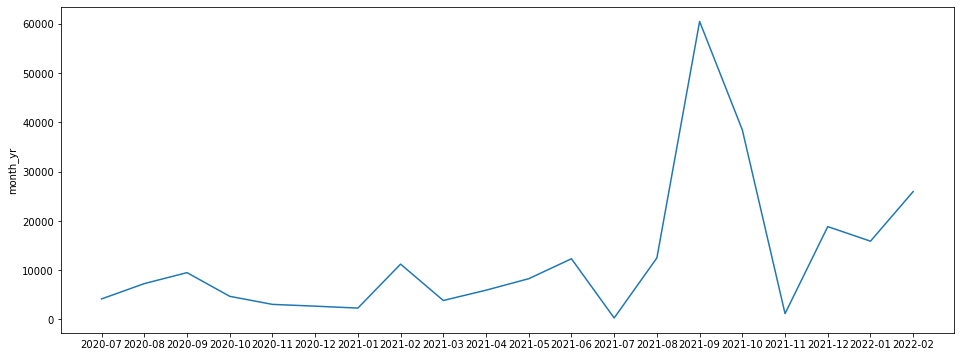

In [51]:
plt.figure(figsize=(16, 6))
(joined_dfs
 .month_yr
 .value_counts(sort = False)
 .pipe((sns.lineplot, 'data'))
)
plt.xticks(np.arange(0, 20, 1))
plt.show()

# Spike is from lifting corona measures.

## Modeling

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [53]:
model_df = joined_dfs.filter(['jam_start', 'month_yr', 'year'], axis=1).set_index('jam_start', drop = False)
model_df['count'] = model_df.groupby('month_yr')['month_yr'].transform('count')
model_df = model_df.reset_index(drop = True)

In [54]:
joined_dfs['month_yr'].value_counts()

2021-09    60494
2021-10    38486
2022-02    25971
2021-12    18853
2022-01    15892
2021-08    12497
2021-06    12326
2021-02    11237
2020-09     9510
2021-05     8278
2020-08     7280
2021-04     5945
2020-10     4703
2020-07     4171
2021-03     3854
2020-11     3066
2020-12     2704
2021-01     2313
2021-11     1191
2021-07      306
Name: month_yr, dtype: int64

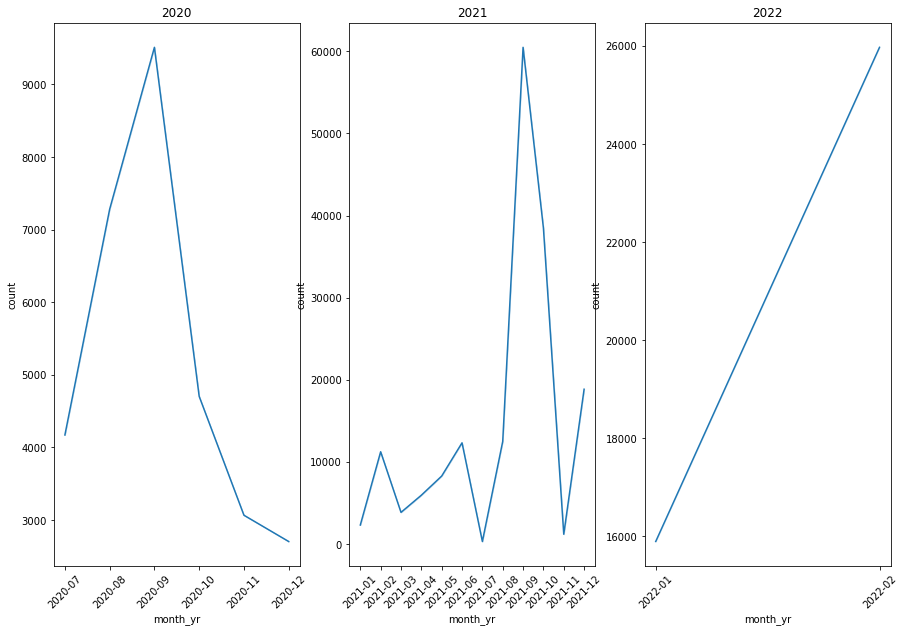

In [55]:
fig, ax = plt.subplots(1,3,figsize=(15,10))
lp = sns.lineplot(x='month_yr', y=model_df['count'], data=model_df[model_df['year'] == 2020], ax=ax[0]).set(title='2020')
lp = sns.lineplot(x='month_yr', y=model_df['count'], data=model_df[model_df['year'] == 2021], ax=ax[1]).set(title='2021')
lp = sns.lineplot(x='month_yr', y=model_df['count'], data=model_df[model_df['year'] == 2022], ax=ax[2]).set(title='2022')
for plot in ax:
    plot.tick_params(axis='x', labelrotation=45)

In [75]:
model2_df = joined_dfs.filter(['jam_start', 'month_yr', 'year'], axis=1)
model2_df['date'] = model2_df['jam_start'].dt.normalize()
model2_df['count'] = model2_df.groupby('date')['date'].transform('count')
model2_df = model2_df.drop(columns = ['jam_start'])
model2_df = model2_df.drop_duplicates().set_index('date', drop = False)
model2_df

,month_yr,year,date,count
date,,,,
2020-07-13,2020-07,2020,2020-07-13,145
2020-07-14,2020-07,2020,2020-07-14,396
2020-07-15,2020-07,2020,2020-07-15,303
2020-07-16,2020-07,2020,2020-07-16,356
2020-07-17,2020-07,2020,2020-07-17,722
...,...,...,...,...
2022-02-19,2022-02,2022,2022-02-19,471
2022-02-20,2022-02,2022,2022-02-20,191
2022-02-21,2022-02,2022,2022-02-21,1270


In [76]:
import statsmodels
import statsmodels.api as sm
import itertools
import warnings

# Function for fitting model and returning the results object
def FitModel(param, seasonalParam):
    saim = sm.tsa.statespace.SARIMAX(model2_df[['count']],
                                order=param,
                                seasonal_order=seasonalParam,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    return saim.fit()

In [77]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonalPdq = [(x[0], x[1], x[2], 12) for x in pdq]

results = dict()
# Run through every pdq variant
for param in pdq:
#     Run through every seaonsal PDQ variant aswell
    for seasonalParam in seasonalPdq:
        try:
#             Store the results in dict
            results[f"{param}-{seasonalParam}"] = FitModel(param, seasonalParam)
        except:
            continue

C:\Users\dorin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dorin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dorin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dorin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no ass

In [78]:
resultsdf = pd.DataFrame(columns=['params', 'AIC'])
for name, result in results.items():
    resultsdf = resultsdf.append({'params': name, 'AIC': result.aic}, ignore_index=True)

resultsdf.sort_values('AIC', ascending=True).head(5)

,params,AIC
63,"(1, 1, 1)-(1, 1, 1, 12)",7183.509339
59,"(1, 1, 1)-(0, 1, 1, 12)",7188.796690
47,"(1, 0, 1)-(1, 1, 1, 12)",7237.534832
43,"(1, 0, 1)-(0, 1, 1, 12)",7238.684659
31,"(0, 1, 1)-(1, 1, 1, 12)",7245.092249


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4473      0.038     11.675      0.000       0.372       0.522
ma.L1         -0.8533      0.033    -26.229      0.000      -0.917      -0.790
ar.S.L12      -0.1271      0.043     -2.941      0.003      -0.212      -0.042
ma.S.L12      -1.0000      0.019    -53.407      0.000      -1.037      -0.963
sigma2       2.03e+05   9.22e-08    2.2e+12      0.000    2.03e+05    2.03e+05


C:\Users\dorin\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


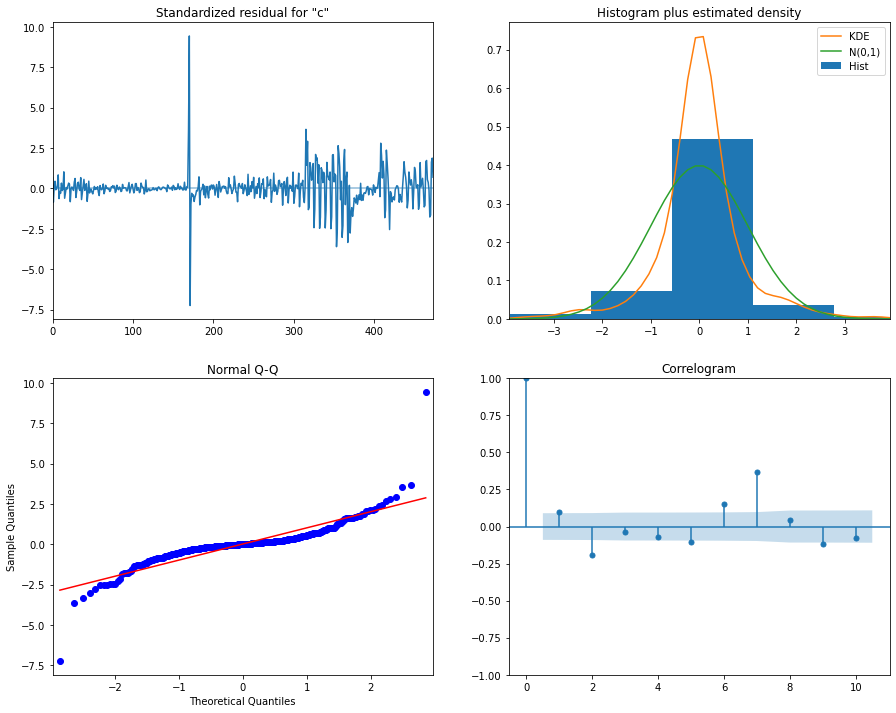

In [79]:
print(results['(1, 1, 1)-(1, 1, 1, 12)'].summary().tables[1])
results['(1, 1, 1)-(1, 1, 1, 12)'].plot_diagnostics(figsize=(15, 12))
plt.show()

In [80]:
model2_df[['count']].describe()

,count
count,501.000000
mean,497.159681
std,728.680203
min,1.000000
25%,100.000000
50%,199.000000
75%,476.000000
max,5504.000000


In [81]:
mdl = results['(1, 1, 1)-(1, 1, 1, 12)']

In [83]:
pred = mdl.get_prediction(start=pd.to_datetime('2022-01-01'), dynamic=False)
pred_ci = pred.conf_int()

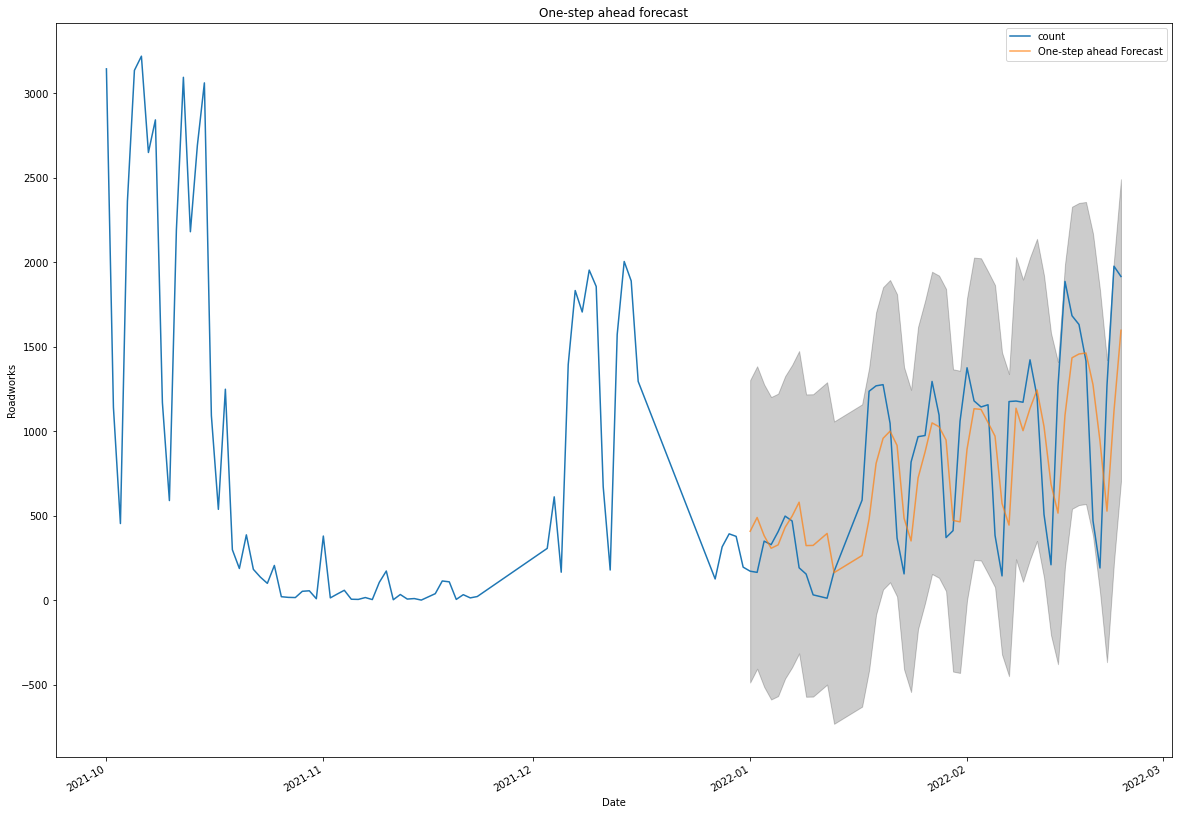

In [84]:
# Show reference data
ax = model2_df[['count']]['2021-10':].plot(label='observed', figsize=(20, 15))
# Show predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
# Show confidence of the model's prediction
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Traffic jams')
ax.set_title('One-step ahead forecast')
plt.legend()

plt.show()

In [85]:
pred_date = '2022-01-01'
pred_dynamic = mdl.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

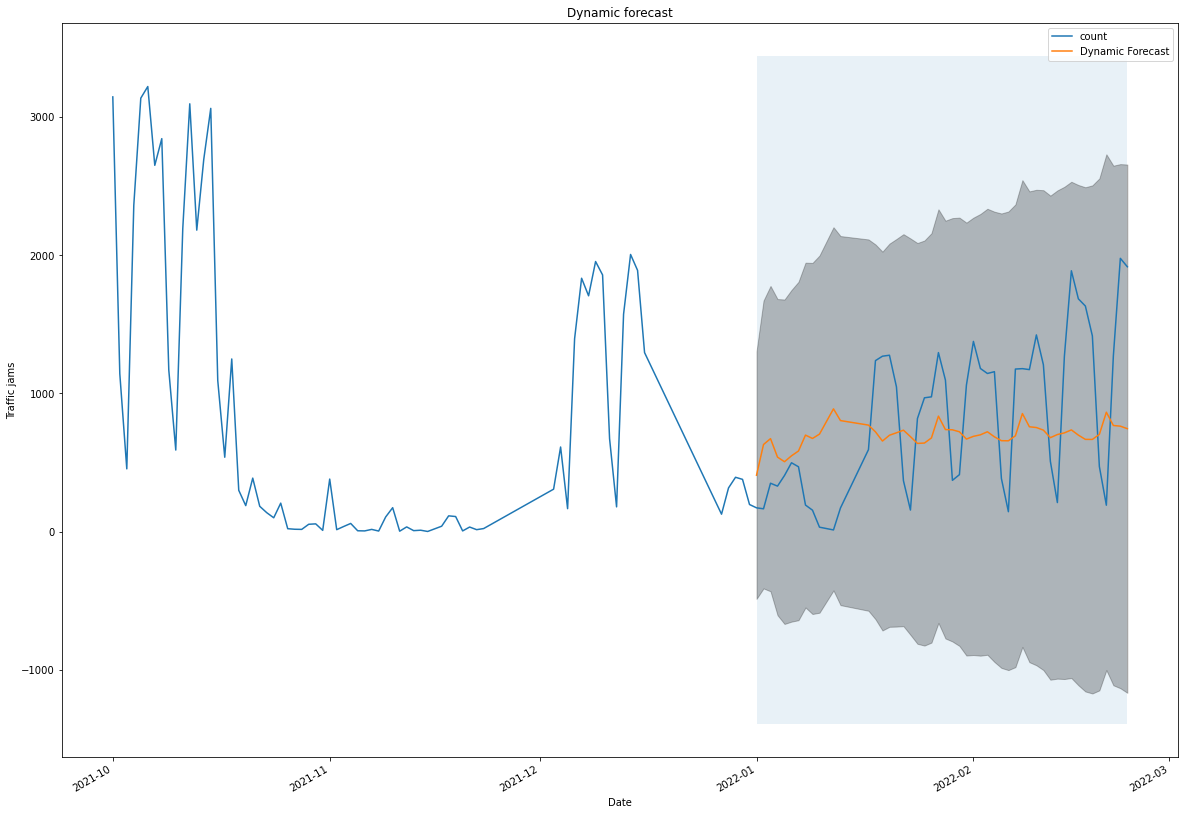

In [86]:
# Show reference data
ax = model2_df[['count']]['2021-10':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
# Show predicted values
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
# Show confidence of the model's prediction
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime(pred_date), model2_df[['count']].index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Traffic jams')
ax.set_title('Dynamic forecast')

plt.legend()
plt.show()